# Statistics in Data Science
Created by: Ari Sulistiyo Prabowo

## Basic Statistic
  - Measures of Central Tendency
  - Measures of Dispersion
  - Proportion


_____

In [1]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/densaiko/data_science_learning/main/dataset/USA_cars_datasets%20.csv")
data.head()

,index,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


# Basic Statistic

## Measures of Central Tendency

In [3]:
# Mean of price in USA datasets
mean = data['price'].mean()
print("The mean of Price: {:.2f}".format(round(mean,2)))

# Mode of price in USA datasets
mode = data['price'].mode()
print("The mode of Price: {}".format(int(mode)))

# Mode of price in USA datasets
median = data['price'].median()
print("The median of Price: {}".format(int(median)))

The mean of Price: 18767.67
The mode of Price: 0
The median of Price: 16900


## Measures of Dispersion

The average of price between BMW and Mercedez-Benz

In [4]:
# The average of price in Mercedez-Benz
mer = data[data['brand'] == 'mercedes-benz']
mean_mer = mer['price'].mean()
print("The average price of mercedes-benz: {:.2f}".format(round(mean_mer,2)))

# The average of price in Bmw 
bmw = data[data['brand'] == 'bmw']
mean_bmw = bmw['price'].mean()
print("The average price of bmw: {:.2f}".format(round(mean_bmw,2)))

The average price of mercedes-benz: 28704.00
The average price of bmw: 26397.06


Dispersion of price between BMW and Mercedez-Benz

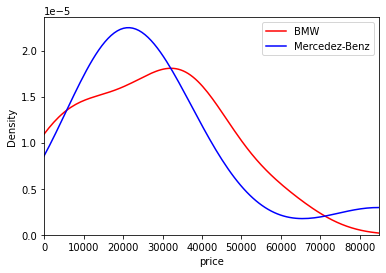

In [5]:
sns.kdeplot(bmw['price'], color='red', label='BMW').set(xlim=(0, bmw['price'].max()))
sns.kdeplot(mer['price'], color='blue', label='Mercedez-Benz').set(xlim=(0, mer['price'].max()))
plt.legend()
plt.show()

Standard Deviation between BMW and Mercedez-Benz

In [6]:
# The standard deviation of price in Mercedez-Benz
std_mer = mer['price'].std()
print("The average price of Mercedez-Benz: {:.2f}".format(std_mer))

# The standard deviation of price in BMW 
std_bmw = bmw['price'].std()
print("The average price of BMW: {:.2f}".format(std_bmw))

The average price of Mercedez-Benz: 21468.48
The average price of BMW: 18204.85


## Proportion

In [7]:
# what is the percentage of ford card compare to another brand?
proportion = pd.DataFrame(data['brand'].value_counts())
proportion = proportion.rename(columns={'brand':'Amount'})
proportion['Proportion(%)'] = data['brand'].value_counts(normalize=True)
proportion = proportion.rename_axis('Brand').reset_index()

# show the five first rows
proportion.head()

,Brand,Amount,Proportion(%)
0,ford,1235,0.494198
1,dodge,432,0.172869
2,nissan,312,0.124850
3,chevrolet,297,0.118848
4,gmc,42,0.016807


### Practice
1. What is the proportion of every single brand from usa car dataset?
2. How many cars with ford brand, especially with green color?
3. What is the proportion of chevrolet car in Indiana, Florida, Ohio, and Tennesee?
4. What is the proportion of every single brand which has the range price between 10.000 - 20.000?
5. What kind of title_status and show the proportion in usa car dataset?
______

In [8]:
# Answer 1
ans_1 = pd.DataFrame(data['brand'].value_counts(normalize=True))
ans_1 = ans_1.rename(columns={'brand':'Proportion'})
ans_1 = ans_1.rename_axis('Brand').reset_index()

ans_1

,Brand,Proportion
0,ford,0.494198
1,dodge,0.172869
2,nissan,0.124850
3,chevrolet,0.118848
4,gmc,0.016807
5,jeep,0.012005
6,chrysler,0.007203
7,bmw,0.006803
8,hyundai,0.006002
9,buick,0.005202


In [9]:
# Answer 2
ans_2 = data[(data['brand'] == 'ford') & (data['color'] == 'green')]
len(ans_2)

11

In [10]:
# Answer 3
ans_3 = data[(data['brand']=='chevrolet') & ((data['state']=='florida') | (data['state']=='indiana') | (data['state']=='ohio') | (data['state']=='tennese'))]
ans_3['state'].value_counts(normalize=True)

florida    0.777778
indiana    0.185185
ohio       0.037037
Name: state, dtype: float64

In [11]:
# Answer 4
data_range = data[(data['price'] >= 10000) & (data['price'] <= 20000 )]
ans_4 = pd.DataFrame(data_range['brand'].value_counts())
ans_4 = ans_4.rename(columns={'brand':'Amount'})
ans_4['Proportion(%)'] = data_range['brand'].value_counts(normalize=True)
ans_4 = ans_4.rename_axis('Brand').reset_index()

ans_4.head(10)

,Brand,Amount,Proportion(%)
0,ford,328,0.371041
1,dodge,199,0.225113
2,nissan,176,0.199095
3,chevrolet,102,0.115385
4,jeep,17,0.019231
5,gmc,17,0.019231
6,infiniti,12,0.013575
7,kia,6,0.006787
8,chrysler,6,0.006787
9,mercedes-benz,5,0.005656


In [12]:
# Answer 5
ans_5 = pd.DataFrame(data['title_status'].value_counts(normalize=True))
ans_5 = ans_5.rename(columns={'title_status':'Proportion'})
ans_5 = ans_5.rename_axis('title_status').reset_index()

ans_5

,title_status,Proportion
0,clean vehicle,0.934774
1,salvage insurance,0.065226
